    ## AuxTel test LTS-337-014 (Large Slew and Settle)

In this notebook, we check the speed and accuracy of the slew and settle of the telescope with a certain change.  Desired specs:

| Description | Value       | Unit          |   Name     |
| :---        |    :----:   |       :----:  |       ---: |
|The pointing accuracy requirement for large slews is: | 10       | Arcsec RMS   |Aux_Tel_Lg_Slew_Abs_Pointing|
|The elevation slew size used to define the Aux_Tel_Lg_Slew_Abs_Pointing requirement is:| 60| Degrees |Aux_Tel_Lg_Elev_Slew|
|The azimuth slew size used to define the Aux_Tel_Lg_Slew_Abs_Pointing requirement is:  |90      | Degrees     |Aux_Tel_Lg_Az_Slew|
|The allotted time to perform a slew and settle by Aux_Tel_Lg_Elev_Slew and Aux_Tel_Lg_Az_Slew by the Auxiliary Telescope and meet the Aux_Tel_Lg_Slew_Abs_Pointing pointing requirement.      | 40|Seconds|Aux_Tel_Lgslew_AcqTime|


Specification: The Auxiliary Telescope shall slew and settle Aux_Tel_Lg_Az_slew degrees in azimuth and Aux_Tel_Lg_Elev_slew degrees in elevation in Aux_Tel_Lgslew_AcqTime seconds, with the maximum RMS pointing error for this repositioning given by Aux_Tel_Lg_Slew_Abs_Pointing. This requirement shall be met with slews originating from any point in the pointing range. This requirement shall also include the repositioning of the instrument rotators. The drives of each axis shall be movable simultaneously. The RMS pointing error shall be measured over 1 second immediately following the slew and settle.

Contained in this notebook are the test and results of several 'large slews' of 60 degrees in elevation and 90 degres in azimuth. The slew and settle acquisition time and pointing accuracy of the slew has been measured for each slew test. The slews originated from different positions in the pointing range. Results are shown in the Results section below, and also will be saved in a file (Attached AuxTel_LTS-337-014_220408)

This notebook is divided into 4 sections:
1. Notebook and ATCS Setup 
2. Test 
    a. Configuration
    b. Test
    c. Save results
    d. System shutdown
3. Results
    a. Slew Times
    b. Mount position plots
    c. Pointing accuracy 
4. Conclusion. 

# 1. Notebook and System Setup

In [1]:
import sys, time, os, asyncio

from datetime import datetime, date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lsst.ts import salobj
from lsst.ts.observatory.control.auxtel.atcs import ATCS
from lsst.ts.observatory.control.auxtel.latiss import LATISS
from lsst.ts.observatory.control.utils import RotType

from astropy.time import Time, TimeDelta
from astropy.coordinates import AltAz, ICRS, EarthLocation, Angle, FK5
import astropy.units as u


from lsst_efd_client import EfdClient


In [2]:
import logging
stream_handler = logging.StreamHandler(sys.stdout)
logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.INFO

In [3]:
# Get EFD client 
client = EfdClient('summit_efd')

In [4]:
#get classes and start them
domain = salobj.Domain()

In [5]:
atcs = ATCS(domain)
latiss = LATISS(domain)
await asyncio.gather(atcs.start_task, latiss.start_task)

Read historical data in 0.01 sec


Read historical data in 0.03 sec


Read historical data in 0.04 sec


Read historical data in 0.06 sec


Read historical data in 0.07 sec


Read historical data in 0.09 sec


Read historical data in 0.11 sec


Read historical data in 0.12 sec


Read historical data in 0.13 sec


Read historical data in 0.14 sec


Read historical data in 0.16 sec


[[None, None, None, None, None, None, None], [None, None, None, None]]

In [ ]:
# enable components if required
await atcs.enable()
await latiss.enable()

In [6]:
# Enable Dome following - Taking Images 
await atcs.enable_dome_following()

In [ ]:
# turn on ATAOS corrections just to make sure the mirror 
# is under air
tmp = await atcs.rem.ataos.cmd_enableCorrection.set_start(
    m1=True, hexapod=True, atspectrograph=True)

In [27]:
test_type = 'Large Slew and Settle - LTS-337-014'
filename = 'AuxTel_LTS-337-014_' + date.today().strftime("%y%m%d") + '.txt'

In [8]:
# Enter the filename where to save the results.
with open(filename, 'a') as f:
    f.write(f'{test_type} on {time.asctime()} \n')
    f.write('Start_Time[UTC], End_Time[UTC], Start_Azimuth[deg], ' 
            'Start_Elevation[deg], Slew_Time[s], Start_image, End_image\n')

f.close()

# 2. Test

## Configuration

In [40]:
# Large Slew and Settle - test name and number of iterations. 
number_of_iterations = 1

# Declare Origin Position
origin_az= 250
origin_el= 24
origin_rot_pa=0

# Declare offset 
delta_az= 90 # degrees
delta_el = 60 # degrees
delta_rot= 0 # degrees

target_az = origin_az + delta_az
target_el = origin_el + delta_el
target_rot = origin_rot_pa + delta_rot

if origin_el not in range(18,86) or target_el not in range(18,86):
    print('Caution: Review origin elevation and/or target elevation configuration')
    print(origin_el, target_el)
else:
    print(f'This is the {test_type} test \n'
      f'The initial azimuth is {origin_az} degrees \n'
      f'The final azimuth {target_az} degrees \n'
      f'The initial elevation is {origin_el} degrees \n'
      f'The final elevation {target_el} degrees \n'
      f'Results will be saved in {filename}')

This is the Large Slew and Settle - LTS-337-014 test 
The initial azimuth is 250 degrees 
The final azimuth 340 degrees 
The initial elevation is 24 degrees 
The final elevation 84 degrees 
Results will be saved in AuxTel_LTS-337-014_220408.txt


In [ ]:
time_start = Time('2022-05-20T18:00:00',scale='utc')
time_end = Time('2022-05-20T18:01:00',scale='utc')

data = await client.select_time_series(
          "lsst.sal.MTRotator.rotation", 
          fields=["demandPosition", "demandVelocity", "demandAcceleration", "actualPosition", "actualVelocity", "timestamp"], 
          start=time_start, 
          end=time_end)

In [ ]:
    time_operation = np.array(data.timestamp.subtract(data.timestamp[0]))

In [ ]:
data

,demandPosition,demandVelocity,demandAcceleration,actualPosition,actualVelocity,timestamp
2022-05-20 18:00:00.005000+00:00,-2.966377e-16,0,0,0.000150,-0.000075,1.653070e+09
2022-05-20 18:00:00.054000+00:00,-2.966377e-16,0,0,0.000151,0.000103,1.653070e+09
2022-05-20 18:00:00.105000+00:00,-2.966377e-16,0,0,0.000152,-0.000080,1.653070e+09
2022-05-20 18:00:00.155000+00:00,-2.966377e-16,0,0,0.000152,-0.000014,1.653070e+09
2022-05-20 18:00:00.205000+00:00,-2.966377e-16,0,0,0.000153,-0.000089,1.653070e+09
...,...,...,...,...,...,...
2022-05-20 18:00:59.768000+00:00,-2.966377e-16,0,0,0.000152,0.000040,1.653070e+09
2022-05-20 18:00:59.818000+00:00,-2.966377e-16,0,0,0.000152,-0.000012,1.653070e+09
2022-05-20 18:00:59.868000+00:00,-2.966377e-16,0,0,0.000151,0.000214,1.653070e+09
2022-05-20 18:00:59.918000+00:00,-2.966377e-16,0,0,0.000151,-0.000184,1.653070e+09


In [41]:
# Find targets
origin_source = await atcs.find_target(origin_az, origin_el, mag_limit=9.0, radius=0.5) 
target_source = await atcs.find_target(target_az, target_el, mag_limit=9.0, radius =0.5)
print(f'The origin source is {origin_source}. The target source is {target_source}')

ra_dec_origin = atcs.radec_from_azel(az = origin_az, el=origin_el)
ra_dec_target = atcs.radec_from_azel(az = target_az, el=target_el)

print(f'Origin source is {origin_source}. Position is AZ {origin_az:0.3f} deg and EL {origin_el:0.3f} deg, ' 
      f'which is RA {ra_dec_origin.ra:0.3f} and DEC {ra_dec_origin.dec:0.3f}')
print(f'Target source is {target_source}. Position is AZ {target_az:0.3f} deg and EL {target_el:0.3f} deg, ' 
      f'which is RA {ra_dec_origin.ra:0.3f} and DEC {ra_dec_target.ra:0.3f}')


The origin source is HD  44161. The target source is HD  98070
Origin source is HD  44161. Position is AZ 250.000 deg and EL 24.000 deg, which is RA 94.633 deg and DEC -28.333 deg
Target source is HD  98070. Position is AZ 340.000 deg and EL 84.000 deg, which is RA 94.633 deg and DEC 169.584 deg


## Test

In [42]:
print('Starting Test')

# Starting test
start_end_pairs = []

n = 0
while n < number_of_iterations: 
    
    await atcs.stop_tracking()

    # Slew to starting position
    print(f'Slew to origin source {origin_source} at RA {ra_dec_origin.ra:0.3f} and '
          f'DEC {ra_dec_origin.dec:0.3f}')

    await atcs.slew_object(origin_source, rot=origin_rot_pa, 
                           rot_type=RotType.PhysicalSky, 
                           slew_timeout=240.)

    print('Track')
    await asyncio.sleep(1)
    
    # A first image to check pointing
    image_origin = await latiss.take_engtest(exptime=5, 
                                                n=1, 
                                                filter='SDSSi',
                                                grating='empty_1')

    # Now slew to target
    print(f'Slew to target source {target_source} at RA {ra_dec_target.ra:0.3f} and '
          f'DEC {ra_dec_target.dec:0.3f}')

    start_time_target = Time(Time.now(), format='fits', scale='utc')

    await atcs.slew_object(target_source, rot=target_rot, 
                           rot_type=RotType.PhysicalSky, 
                           slew_timeout=240.)
    
    end_time_target = Time(Time.now(), format='fits', scale='utc')
    slew_time_target = TimeDelta(end_time_target - start_time_target, 
                                 format='sec').value
    print(f'Time to slew and settle was {slew_time_target:0.3f} seconds')
    
    await asyncio.sleep(1)
    image_target = await latiss.take_engtest(exptime=5, 
                                                n=1, 
                                                filter='SDSSi',
                                                grating='empty_1')
    
    pair_target = [start_time_target, 
                   end_time_target, 
                   round(slew_time_target,3),
                   image_origin, image_target]
    start_end_pairs.append(pair_target)
    

    # Repeat the slew going back to origin position

    print('Slew back to origin')
    start_time_origin = Time(Time.now(), format='fits', scale='utc')
    
    await atcs.slew_object(origin_source, rot=origin_rot_pa, 
                           rot_type=RotType.PhysicalSky, 
                           slew_timeout=240.)


    end_time_origin = Time(Time.now(), format='fits', scale='utc')
    slew_time_origin = TimeDelta(end_time_origin - start_time_origin, 
                                 format='sec').value
    print(f'Time to slew and settle was {slew_time_origin:0.3f} seconds')
    
    await asyncio.sleep(1)
    image_origin2 = await latiss.take_engtest(exptime=5, 
                                                n=1, 
                                                filter='SDSSi',
                                                grating='empty_1')
    
    pair_origin = [start_time_origin, 
                   end_time_origin, 
                   round(slew_time_origin,3),
                  image_target, image_origin2]
    start_end_pairs.append(pair_origin)

    
    n=n+1
    
    

Starting Test
Slew to origin source HD  44161 at RA 94.633 deg and DEC -28.333 deg


Slewing to HD  44161: 06 19 07.7402 -28 17 47.747


Monitor disabled. Enabling and starting monitoring loop.


[Telescope] delta Alt = +003.630 deg; delta Az = +049.889 deg; delta N1 = -000.000 deg; delta N2 = +000.586 deg [Dome] delta Az = +046.864 deg


[Telescope] delta Alt = +002.442 deg; delta Az = +048.779 deg; delta N1 = +000.000 deg; delta N2 = +000.059 deg [Dome] delta Az = +046.224 deg


[Telescope] delta Alt = +000.170 deg; delta Az = +044.897 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +044.684 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +040.893 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +042.244 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +036.889 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +039.254 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +032.889 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +035.084 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +028.883 deg; delta N1 = -000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = +027.134 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +022.900 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +020.724 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +019.001 deg; delta N1 = -000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = +010.424 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +013.484 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +003.614 deg


ATDome in position.


[Telescope] delta Alt = +000.002 deg; delta Az = +010.160 deg; delta N1 = -000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = -002.446 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +005.932 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -002.916 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +003.722 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = -002.916 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +002.052 deg; delta N1 = +000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = -002.916 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +000.921 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -002.916 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +000.283 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -002.916 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +000.034 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -002.916 deg


ATMCS in position: True.


[Telescope] delta Alt = +000.002 deg; delta Az = -000.000 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -002.916 deg


[Telescope] delta Alt = +000.002 deg; delta Az = -000.002 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -002.916 deg


Setting monitor flag to false.
Track
Slew to target source HD  98070 at RA 169.584 deg and DEC -24.464 deg


Slewing to HD  98070: 11 16 37.1646 -24 29 37.934


Monitor disabled. Enabling and starting monitoring loop.


ATMCS in position: False.


[Telescope] delta Alt = +059.788 deg; delta Az = +084.840 deg; delta N1 = +000.000 deg; delta N2 = -000.131 deg [Dome] delta Az = +081.708 deg


[Telescope] delta Alt = +056.967 deg; delta Az = +087.273 deg; delta N1 = +000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = +080.778 deg


[Telescope] delta Alt = +052.967 deg; delta Az = +091.204 deg; delta N1 = -000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = +078.948 deg


[Telescope] delta Alt = +048.963 deg; delta Az = +095.141 deg; delta N1 = -000.000 deg; delta N2 = -000.020 deg [Dome] delta Az = +076.198 deg


[Telescope] delta Alt = +044.959 deg; delta Az = +099.074 deg; delta N1 = -000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = +072.528 deg


[Telescope] delta Alt = +040.957 deg; delta Az = +103.010 deg; delta N1 = -000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = +067.968 deg


[Telescope] delta Alt = +036.954 deg; delta Az = +106.946 deg; delta N1 = -000.000 deg; delta N2 = -000.045 deg [Dome] delta Az = +059.428 deg


[Telescope] delta Alt = +030.949 deg; delta Az = +112.847 deg; delta N1 = -000.000 deg; delta N2 = -000.043 deg [Dome] delta Az = +049.968 deg


[Telescope] delta Alt = +024.947 deg; delta Az = +118.757 deg; delta N1 = +000.000 deg; delta N2 = -000.019 deg [Dome] delta Az = +043.138 deg


[Telescope] delta Alt = +020.997 deg; delta Az = +122.691 deg; delta N1 = +000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = +036.308 deg


[Telescope] delta Alt = +017.168 deg; delta Az = +126.629 deg; delta N1 = +000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = +029.468 deg


[Telescope] delta Alt = +013.539 deg; delta Az = +130.564 deg; delta N1 = +000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = +022.648 deg


[Telescope] delta Alt = +010.209 deg; delta Az = +134.500 deg; delta N1 = +000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = +015.798 deg


[Telescope] delta Alt = +007.269 deg; delta Az = +138.436 deg; delta N1 = +000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = +008.998 deg


[Telescope] delta Alt = +004.800 deg; delta Az = +142.370 deg; delta N1 = +000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = +002.308 deg


ATDome in position.


[Telescope] delta Alt = +002.845 deg; delta Az = +146.308 deg; delta N1 = -000.000 deg; delta N2 = -000.045 deg [Dome] delta Az = -002.792 deg


[Telescope] delta Alt = +000.935 deg; delta Az = +152.210 deg; delta N1 = +000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.552 deg; delta Az = +154.152 deg; delta N1 = +000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.121 deg; delta Az = +158.114 deg; delta N1 = +000.000 deg; delta N2 = -000.013 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.004 deg; delta Az = +162.057 deg; delta N1 = +000.000 deg; delta N2 = -000.019 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = -000.000 deg; delta Az = +165.993 deg; delta N1 = +000.000 deg; delta N2 = -000.019 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +169.929 deg; delta N1 = +000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +173.865 deg; delta N1 = -000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +177.802 deg; delta N1 = -000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -178.261 deg; delta N1 = +000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -174.326 deg; delta N1 = +000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -170.388 deg; delta N1 = +000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -166.452 deg; delta N1 = -000.000 deg; delta N2 = -000.042 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -160.541 deg; delta N1 = -000.000 deg; delta N2 = -000.019 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -156.604 deg; delta N1 = +000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -152.668 deg; delta N1 = -000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -148.733 deg; delta N1 = -000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -144.793 deg; delta N1 = -000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -140.857 deg; delta N1 = -000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -136.921 deg; delta N1 = -000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -132.983 deg; delta N1 = -000.000 deg; delta N2 = -000.043 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -127.070 deg; delta N1 = +000.000 deg; delta N2 = -000.047 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -121.165 deg; delta N1 = +000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -117.230 deg; delta N1 = -000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -113.290 deg; delta N1 = -000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -109.353 deg; delta N1 = -000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -105.416 deg; delta N1 = -000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -101.476 deg; delta N1 = -000.000 deg; delta N2 = -000.042 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -095.572 deg; delta N1 = -000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -091.634 deg; delta N1 = -000.000 deg; delta N2 = -000.014 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -087.688 deg; delta N1 = -000.000 deg; delta N2 = -000.019 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -083.760 deg; delta N1 = -000.000 deg; delta N2 = -000.012 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -079.813 deg; delta N1 = +000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -075.875 deg; delta N1 = +000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -071.939 deg; delta N1 = +000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -067.998 deg; delta N1 = -000.000 deg; delta N2 = -000.043 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -062.094 deg; delta N1 = -000.000 deg; delta N2 = -000.014 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -058.153 deg; delta N1 = -000.000 deg; delta N2 = -000.014 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -054.215 deg; delta N1 = -000.000 deg; delta N2 = -000.014 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -050.278 deg; delta N1 = -000.000 deg; delta N2 = -000.012 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -046.331 deg; delta N1 = -000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -042.393 deg; delta N1 = -000.000 deg; delta N2 = -000.018 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -038.456 deg; delta N1 = -000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -034.514 deg; delta N1 = -000.000 deg; delta N2 = -000.043 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -028.607 deg; delta N1 = -000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -024.668 deg; delta N1 = -000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -020.777 deg; delta N1 = +000.000 deg; delta N2 = -000.014 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -016.998 deg; delta N1 = -000.000 deg; delta N2 = -000.014 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -013.415 deg; delta N1 = -000.000 deg; delta N2 = -000.013 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -010.118 deg; delta N1 = -000.000 deg; delta N2 = -000.045 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -005.922 deg; delta N1 = -000.000 deg; delta N2 = -000.017 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -003.723 deg; delta N1 = -000.000 deg; delta N2 = -000.043 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -001.425 deg; delta N1 = -000.000 deg; delta N2 = -000.016 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -000.545 deg; delta N1 = +000.000 deg; delta N2 = -000.015 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -000.115 deg; delta N1 = +000.000 deg; delta N2 = -000.014 deg [Dome] delta Az = -002.982 deg


ATMCS in position: True.


[Telescope] delta Alt = +000.001 deg; delta Az = +000.004 deg; delta N1 = -000.000 deg; delta N2 = -000.040 deg [Dome] delta Az = -002.982 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +000.012 deg; delta N1 = +000.000 deg; delta N2 = -000.019 deg [Dome] delta Az = -002.982 deg


Setting monitor flag to false.
Time to slew and settle was 154.996 seconds


Nothing to check.
Slew back to origin


Slewing to HD  44161: 06 19 07.7402 -28 17 47.747


Monitor disabled. Enabling and starting monitoring loop.


ATMCS in position: False.


[Telescope] delta Alt = -060.032 deg; delta Az = -079.995 deg; delta N1 = -000.000 deg; delta N2 = -003.927 deg [Dome] delta Az = -087.939 deg


[Telescope] delta Alt = -057.101 deg; delta Az = -082.537 deg; delta N1 = +000.000 deg; delta N2 = -001.542 deg [Dome] delta Az = -087.019 deg


[Telescope] delta Alt = -053.106 deg; delta Az = -086.537 deg; delta N1 = +000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = -085.179 deg


[Telescope] delta Alt = -049.113 deg; delta Az = -090.540 deg; delta N1 = +000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = -080.729 deg


[Telescope] delta Alt = -043.123 deg; delta Az = -096.545 deg; delta N1 = +000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = -074.229 deg


[Telescope] delta Alt = -037.133 deg; delta Az = -102.549 deg; delta N1 = -000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = -065.709 deg


[Telescope] delta Alt = -031.145 deg; delta Az = -108.555 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -059.029 deg


[Telescope] delta Alt = -027.148 deg; delta Az = -112.557 deg; delta N1 = -000.000 deg; delta N2 = +000.007 deg [Dome] delta Az = -048.779 deg


[Telescope] delta Alt = -021.207 deg; delta Az = -118.563 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -041.929 deg


[Telescope] delta Alt = -017.371 deg; delta Az = -122.565 deg; delta N1 = +000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = -035.789 deg


[Telescope] delta Alt = -013.730 deg; delta Az = -126.568 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -028.949 deg


[Telescope] delta Alt = -010.384 deg; delta Az = -130.572 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -022.099 deg


[Telescope] delta Alt = -007.416 deg; delta Az = -134.574 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -015.259 deg


[Telescope] delta Alt = -004.918 deg; delta Az = -138.577 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -008.399 deg


[Telescope] delta Alt = -002.933 deg; delta Az = -142.581 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = -001.829 deg


ATDome in position.


[Telescope] delta Alt = -001.498 deg; delta Az = -146.584 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.051 deg


[Telescope] delta Alt = -000.584 deg; delta Az = -150.588 deg; delta N1 = +000.000 deg; delta N2 = +000.007 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = -000.039 deg; delta Az = -156.591 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = -160.594 deg; delta N1 = +000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = -164.598 deg; delta N1 = +000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = -168.601 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = -172.604 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = -176.607 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +179.390 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +175.386 deg; delta N1 = +000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +169.382 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +165.379 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +161.375 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +157.372 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +153.369 deg; delta N1 = +000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +149.366 deg; delta N1 = +000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +145.363 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +141.359 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +137.356 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +133.354 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +129.350 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +125.347 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +121.344 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +117.341 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +113.338 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +109.336 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +105.332 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +101.328 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +097.325 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +093.322 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +089.320 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +085.315 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +081.312 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +077.310 deg; delta N1 = +000.000 deg; delta N2 = +000.007 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +071.305 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +067.302 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +063.298 deg; delta N1 = +000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +057.294 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +053.291 deg; delta N1 = +000.000 deg; delta N2 = +000.007 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +047.286 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +043.283 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +039.280 deg; delta N1 = -000.000 deg; delta N2 = +000.007 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = -000.001 deg; delta Az = +035.275 deg; delta N1 = -000.000 deg; delta N2 = -000.001 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +031.273 deg; delta N1 = -000.000 deg; delta N2 = +000.002 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +027.266 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +023.280 deg; delta N1 = +000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +017.461 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +013.809 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +010.450 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +007.470 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +004.956 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.001 deg; delta Az = +002.962 deg; delta N1 = -000.000 deg; delta N2 = +000.007 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +000.993 deg; delta N1 = -000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +000.317 deg; delta N1 = +000.000 deg; delta N2 = +000.003 deg [Dome] delta Az = +002.921 deg


[Telescope] delta Alt = +000.002 deg; delta Az = +000.042 deg; delta N1 = +000.000 deg; delta N2 = +000.008 deg [Dome] delta Az = +002.921 deg


ATMCS in position: True.


[Telescope] delta Alt = +000.002 deg; delta Az = -000.001 deg; delta N1 = +000.000 deg; delta N2 = +000.007 deg [Dome] delta Az = +002.921 deg


Setting monitor flag to false.
Time to slew and settle was 155.227 seconds


Nothing to check.


## Save results

In [43]:
# Save test results in a file (See file attached)
with open(filename, 'a') as f:
    for item in start_end_pairs:
        f.write(f'{item[0].value},{item[1].value},{origin_az},{origin_el},{item[2]}, '
                f'{item[3]}, {item[4]}\n')
f.close()
print(f'Start/end move times [UTC], slew duration (s), starting azimuth/' 
      f'elevation (deg) and start/end images are saved in {filename}')

Start/end move times [UTC], slew duration (s), starting azimuth/elevation (deg) and start/end images are saved in AuxTel_LTS-337-014_220408.txt


## System Shutdown

In [ ]:
# For shutdown of system
await atcs.stop_tracking()

In [ ]:
# turn off corrections
tmp = await atcs.rem.ataos.cmd_disableCorrection.set_start(m1=True, hexapod=True, atspectrograph=True)

In [ ]:
# Putting everything back in standby.
await atcs.shutdown()

# 3. Results 

## Slew Acquisition Times

In [ ]:
# Print results

In [28]:
with open(filename, 'r') as f:
    print(f.read())


Large Slew and Settle - LTS-337-014 on Fri Apr  8 02:27:49 2022 
Start_Time[UTC], End_Time[UTC], Start_Azimuth[deg], Start_Elevation[deg], Slew_Time[s], Start_image, End_image
2022-04-08T02:35:39.609,2022-04-08T02:36:40.154,100,80,60.544, [2022040700267], [2022040700268]
2022-04-08T02:37:04.088,2022-04-08T02:38:04.497,100,80,60.409, [2022040700268], [2022040700269]
2022-04-08T02:47:53.470,2022-04-08T02:48:51.243,180,82,57.773, [2022040700272], [2022040700273]
2022-04-08T02:49:43.200,2022-04-08T02:50:40.044,180,82,56.844, [2022040700274], [2022040700275]
2022-04-08T02:50:59.227,2022-04-08T02:51:54.697,180,82,55.47, [2022040700275], [2022040700276]
2022-04-08T02:56:51.637,2022-04-08T02:57:53.498,200,21,61.861, [2022040700277], [2022040700278]
2022-04-08T02:58:02.406,2022-04-08T02:59:04.549,200,21,62.143, [2022040700278], [2022040700279]
2022-04-08T03:02:35.269,2022-04-08T03:03:35.644,200,21,60.375, [2022040700280], [2022040700281]
2022-04-08T03:03:44.615,2022-04-08T03:04:44.897,200,21,60

In [ ]:
# Plots

In [29]:
# import pandas module 
import pandas as pd 
    
# making dataframe 
df = pd.read_csv(filename, skiprows=1, 
                 skipinitialspace=True) 
df

,Start_Time[UTC],End_Time[UTC],Start_Azimuth[deg],Start_Elevation[deg],Slew_Time[s],Start_image,End_image
0,2022-04-08T02:35:39.609,2022-04-08T02:36:40.154,100,80,60.544,[2022040700267],[2022040700268]
1,2022-04-08T02:37:04.088,2022-04-08T02:38:04.497,100,80,60.409,[2022040700268],[2022040700269]
2,2022-04-08T02:47:53.470,2022-04-08T02:48:51.243,180,82,57.773,[2022040700272],[2022040700273]
3,2022-04-08T02:49:43.200,2022-04-08T02:50:40.044,180,82,56.844,[2022040700274],[2022040700275]
4,2022-04-08T02:50:59.227,2022-04-08T02:51:54.697,180,82,55.470,[2022040700275],[2022040700276]
5,2022-04-08T02:56:51.637,2022-04-08T02:57:53.498,200,21,61.861,[2022040700277],[2022040700278]
6,2022-04-08T02:58:02.406,2022-04-08T02:59:04.549,200,21,62.143,[2022040700278],[2022040700279]
7,2022-04-08T03:02:35.269,2022-04-08T03:03:35.644,200,21,60.375,[2022040700280],[2022040700281]
8,2022-04-08T03:03:44.615,2022-04-08T03:04:44.897,200,21,60.282,[2022040700281],[2022040700282]


Text(0.5, 0, 'Azimuth [deg]')

logMessage DDS read queue is filling: 11 of 100 elements


logMessage DDS read queue is filling: 17 of 100 elements


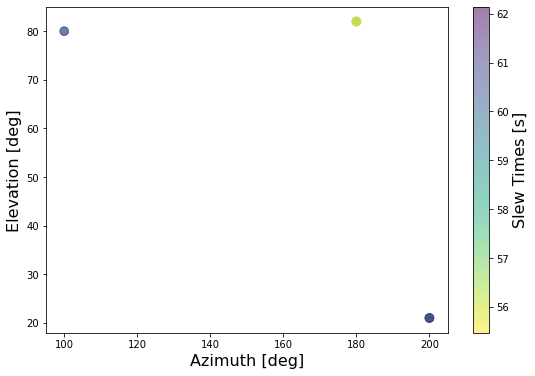

In [89]:
fig = plt.figure(figsize=(9,6))
plt.scatter(df['Start_Azimuth[deg]'], df['Start_Elevation[deg]'], 
            s=75, alpha=0.5, c=df['Slew_time[s]'], label=f'Slew Times', cmap='viridis_r')
plt.colorbar().set_label('Slew Times [s]',fontsize=16)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)


***

In [37]:
largeSlew_AcqTime = df['Slew_Time[s]'].mean()
largeSlew_AcqTime_min = df['Slew_Time[s]'].min()
print(f'The average time to perform a slew and settle by 90 deg azimuth and 60 deg elevation '
      f'by the Auxiliary Telescope is {largeSlew_AcqTime:0.2f} s.\n'
      f'The shortest time spent in a large slew was {largeSlew_AcqTime_min:0.2f} s')

The average time to perform a slew and settle by 90 deg azimuth and 60 deg elevation by the Auxiliary Telescope is 59.52 s.
The shortest time spent in a large slew was 55.47 s


***

## Mount position plot

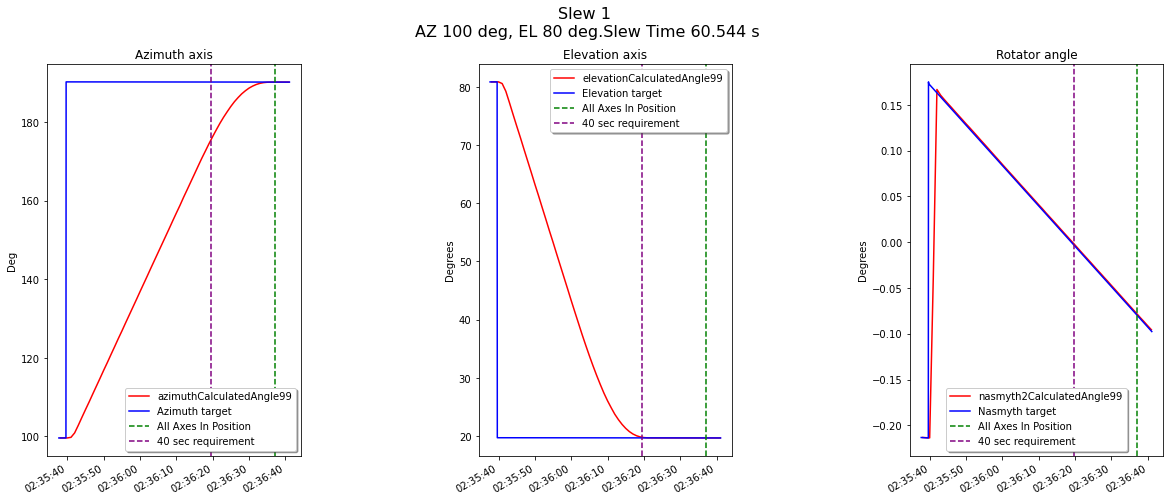

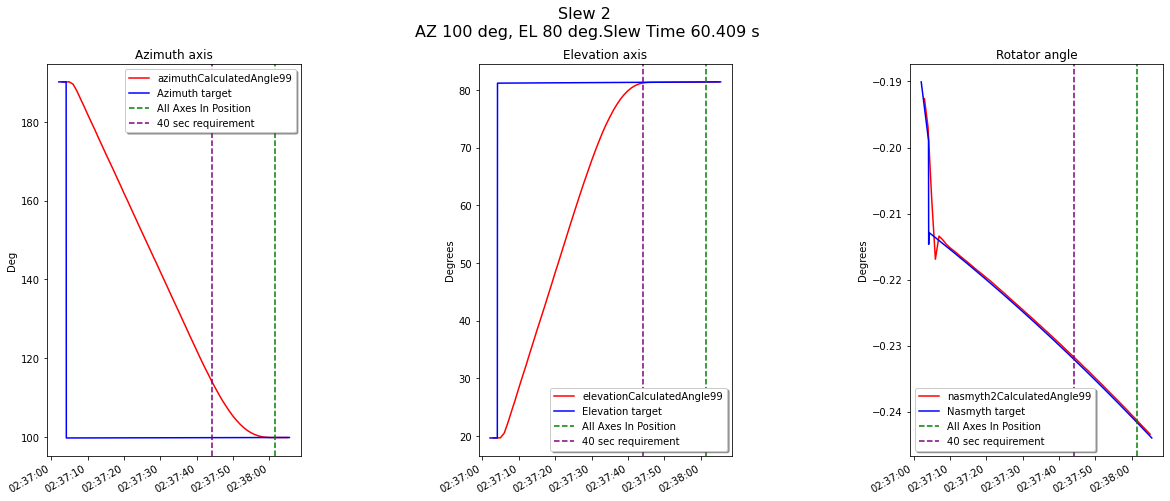

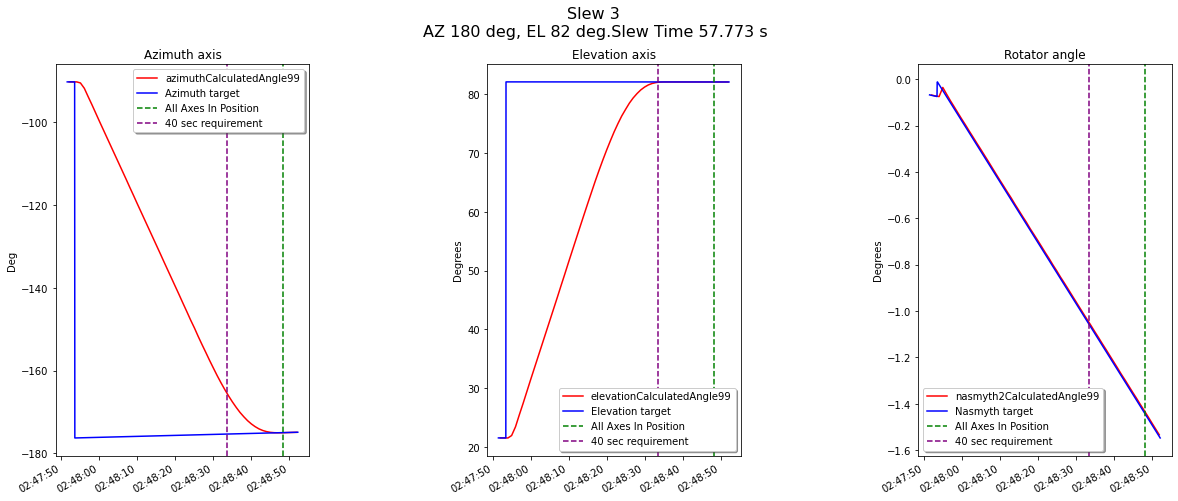

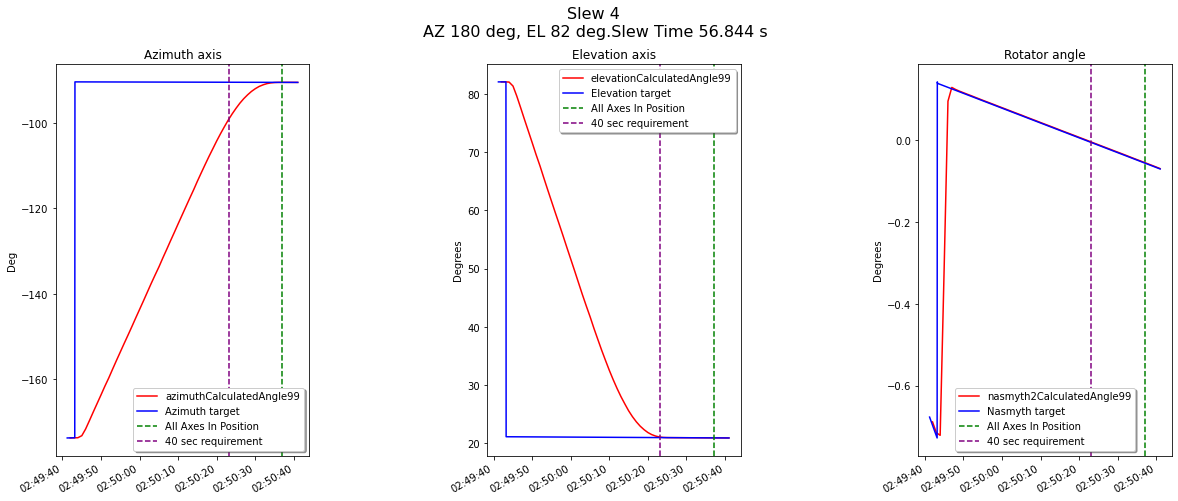

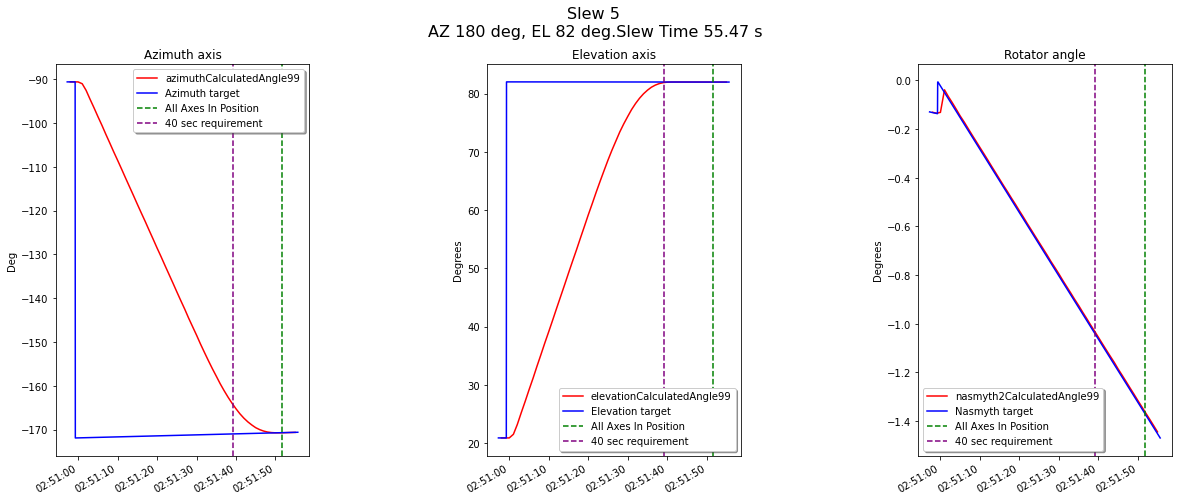

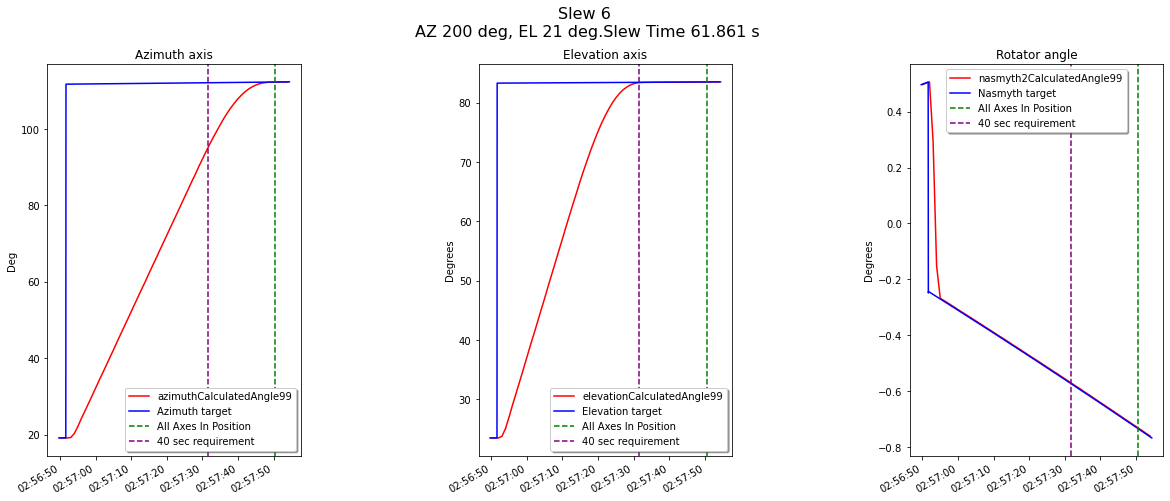

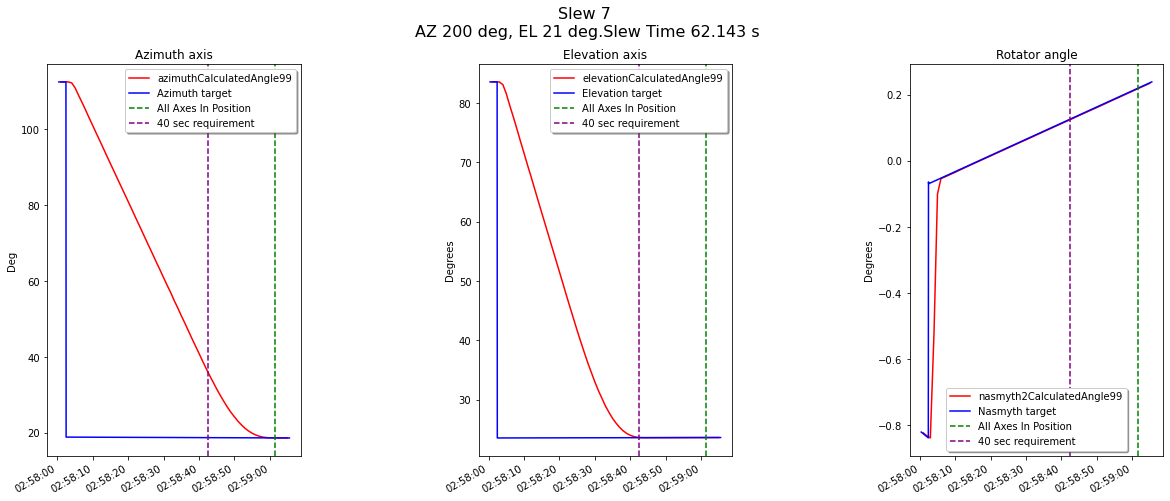

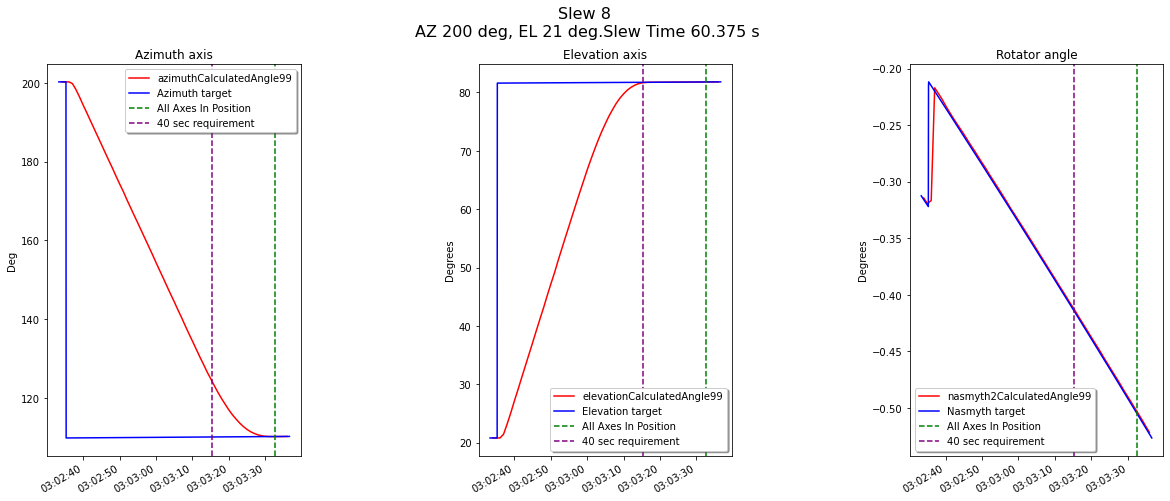

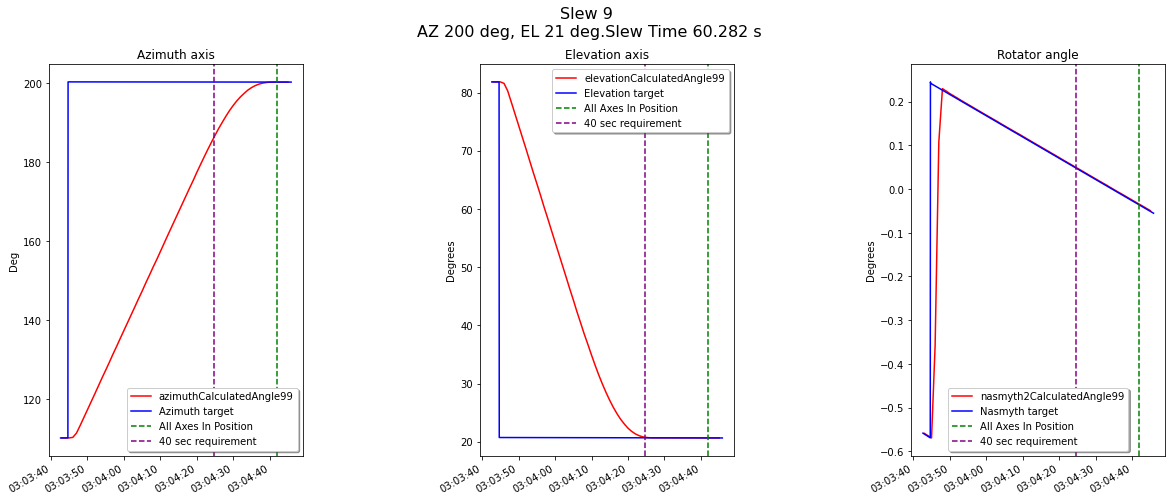

target python read queue is filling: 58 of 100 elements


In [91]:
for i in range(len(df)):
    before, after = 2, 1
    t_start = Time(df['Start_Time[UTC]'][i],scale='utc') - TimeDelta(before, format='sec')
    t_end = Time(df['End_Time[UTC]'][i],scale='utc') + TimeDelta(after, format='sec')

    
    # Query EFD to get rotator azimuth, elevation mount positions and target coordinates
    mount = await client.select_time_series("lsst.sal.ATPtg.mountPositions", 
        ["azimuthCalculatedAngle99", "elevationCalculatedAngle99"], 
                                            t_start, t_end)
    target = await client.select_time_series("lsst.sal.ATMCS.command_trackTarget", 
                                            ["azimuth","elevation", "nasmyth2RotatorAngle"],  
                                             t_start, t_end)
    
    nasmyth = await client.select_time_series("lsst.sal.ATMCS.mount_Nasmyth_Encoders", 
                                              ['nasmyth2CalculatedAngle99'],
                                              t_start, t_end)

    # Find all axes in position
    all_axes_in_position = await client.select_time_series(
      'lsst.sal.ATMCS.logevent_allAxesInPosition', ['inPosition'],t_start, t_end)
    inPosition = all_axes_in_position[all_axes_in_position['inPosition']==True] 
    
    # Requirement
    requirement = (Time(df['Start_Time[UTC]'][i],scale='utc') + TimeDelta(
         40, format='sec')).datetime64  
    azimuth = (df['Start_Azimuth[deg]'][i])
    elevation = (df['Start_Elevation[deg]'][i])
    time = df['Slew_time[s]'][i]
    # Plot it
    fig = plt.figure(figsize = (20,8))
    plt.subplots_adjust(wspace=0.7)
    plt.suptitle(f'Slew {i+1} \n'
                  f'AZ {azimuth} deg, EL {elevation} deg.' 
                  f'Slew Time {time} s', 
                  fontsize = 16)
    # Azimuth axis
    plt.subplot(1,3,1)
    ax1 = mount['azimuthCalculatedAngle99'].plot(color='red')
    ax1.plot(target.index, target["azimuth"], label='Azimuth target', 
             color='blue')
    ax1.set_title("Azimuth axis", fontsize=12)
    ax1.axvline(inPosition.index[0], color="green", linestyle="--", 
                label="All Axes In Position")
    ax1.axvline(requirement, 
                color="purple", 
                linestyle="--", 
                label="40 sec requirement")   
    ax1.set_ylabel("Deg")
    ax1.legend(ncol=1, fancybox=True, shadow=True)    

    plt.subplot(1,3,2)
    ax2 = mount['elevationCalculatedAngle99'].plot(legend=False, color='red')
    ax2.plot(target.index, target["elevation"],
             label='Elevation target', color='blue')
    ax2.set_title("Elevation axis", fontsize=12)
    
    ax2.axvline(inPosition.index[0], color="green", linestyle="--", 
                label="All Axes In Position")
    ax2.axvline(requirement, 
                color="purple", 
                linestyle="--", 
                label="40 sec requirement")
    ax2.set_ylabel("Degrees")
    ax2.legend(ncol=1, fancybox=True, shadow=True)    
    
    # Nasmyth
    plt.subplot(1,3,3)
    ax3 = nasmyth['nasmyth2CalculatedAngle99'].plot(legend=False, color='red')
    ax3.plot(target.index, target["nasmyth2RotatorAngle"],
             label='Nasmyth target', color='blue')
    ax3.set_title("Rotator angle", fontsize=12)
    ax3.axvline(inPosition.index[0], color="green", linestyle="--", 
                label="All Axes In Position")
    ax3.axvline(requirement, 
                color="purple", 
                linestyle="--", 
                label="40 sec requirement")
    ax3.set_ylabel("Degrees")
    ax3.legend(
          ncol=1, fancybox=True, shadow=True)
    plt.show()

## Pointing accuracy

In [ ]:
# In this part the pointing of the images will be measured and compared to 
# determine the pointing accuracy after a slew. 

In [32]:
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
from lsst.rapid.analysis.bestEffort import BestEffortIsr
import lsst.daf.butler as dafButler
from lsst.geom import PointD

In [33]:
# Call butler
REPO_DIR = '/repo/LATISS'
butler = dafButler.Butler(REPO_DIR, instrument='LATISS', collections = 'LATISS/raw/all')

In [34]:
# BestEffort ISR
bestEffort = BestEffortIsr('/repo/LATISS')

# Configure quickFrameMeasurement Task
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

Instantiating butler with collections=['u/czw/DM-28920/calib.20210720', 'LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook']
Instantiating butler with collections=['u/czw/DM-28920/calib.20210720', 'LATISS/raw/all', 'LATISS/calib', 'LATISS/runs/quickLook']


In [35]:
def calculate_xy_offsets(exp):
    pixel_scale = 0.09569  # arcsec/pixel
    boresight_position = PointD(2036.5, 2000.5)

    """Returns x/y offset in arcseconds from an exp based on current centroid
    and desired position (which is the boresight position in pixels)"""

    data_id = {'instrument': 'LATISS', 'exposure': exp , 'detector':0}

    exp_BestEffort = bestEffort.getExposure(data_id)

    #Measure Centroids
    result = qm.run(exp_BestEffort)
    centroids = PointD(result.brightestObjCentroid[0], result.brightestObjCentroid[1])


    dx_arcsec, dy_arcsec = pixel_scale * (
        centroids - boresight_position
    )

    dr_arcsec = np.sqrt(dx_arcsec**2 + dy_arcsec**2)

    return dx_arcsec, dy_arcsec, dr_arcsec

In [36]:
# Measure x, y and r pointing error in origin and target images for each slew test.
pointing_origin, pointing_target = [], []
dx_origin, dx_target, dy_origin, dy_target = [], [], [], [] 

for i in range(len(df)):
    exp_origin = int(df['Start_image'][i][1:-1])
    
    dx, dy, dr = calculate_xy_offsets(exp_origin)
    
    dx_origin.append(dx)    
    dy_origin.append(dy)
    pointing_origin.append(dr)
    
    exp_target = int(df['End_image'][i][1:-1])
    dx, dy, dr = calculate_xy_offsets(exp_target)

    dx_target.append(dx)    
    dy_target.append(dy)
    pointing_target.append(dr)
    
df['Pointing_Origin[arcsec]'] = pointing_origin
df['dx_origin'] = dx_origin
df['dy_origin'] = dy_origin

df['Pointing_Target[arcssec]'] = pointing_target
df['dx_target'] = dx_target
df['dy_target'] = dy_target


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/meas_algorithms/gd21d4de61c+48a4851ccd/python/lsst/meas/algorithms/installGaussianPsf.py:77: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  psfSigma = psfModel.computeShape().getDeterminantRadius()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/meas_algorithms/gd21d4de61c+48a4851ccd/python/lsst/meas/algorithms/installGaussianPsf.py:78: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  width, height = psfModel.computeImage().getDimensions()


Found 29 sources in exposure
Found 29 sources in exposure


Measured 29 of 29 sources in exposure
Measured 29 of 29 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 16 sources in exposure
Found 16 sources in exposure


Measured 16 of 16 sources in exposure
Measured 16 of 16 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 16 sources in exposure
Found 16 sources in exposure


Measured 16 of 16 sources in exposure
Measured 16 of 16 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 24 sources in exposure
Found 24 sources in exposure


Measured 24 of 24 sources in exposure
Measured 24 of 24 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 43 sources in exposure
Found 43 sources in exposure


Measured 43 of 43 sources in exposure
Measured 43 of 43 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 29 sources in exposure
Found 29 sources in exposure


Measured 29 of 29 sources in exposure
Measured 29 of 29 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 33 sources in exposure
Found 33 sources in exposure


Measured 33 of 33 sources in exposure
Measured 33 of 33 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 36 sources in exposure
Found 36 sources in exposure


Measured 36 of 36 sources in exposure
Measured 36 of 36 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 36 sources in exposure
Found 36 sources in exposure


Measured 36 of 36 sources in exposure
Measured 36 of 36 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 32 sources in exposure
Found 32 sources in exposure


Measured 32 of 32 sources in exposure
Measured 32 of 32 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 9 sources in exposure
Found 9 sources in exposure


Measured 9 of 9 sources in exposure
Measured 9 of 9 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 17 sources in exposure
Found 17 sources in exposure


Measured 17 of 17 sources in exposure
Measured 17 of 17 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 17 sources in exposure
Found 17 sources in exposure


Measured 17 of 17 sources in exposure
Measured 17 of 17 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 4 sources in exposure
Found 4 sources in exposure


Measured 4 of 4 sources in exposure
Measured 4 of 4 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 11 sources in exposure
Found 11 sources in exposure


Measured 11 of 11 sources in exposure
Measured 11 of 11 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 14 sources in exposure
Found 14 sources in exposure


Measured 14 of 14 sources in exposure
Measured 14 of 14 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 14 sources in exposure
Found 14 sources in exposure


Measured 14 of 14 sources in exposure
Measured 14 of 14 sources in exposure


Found a ready-made quickLookExp in the repo. Returning that.
Found a ready-made quickLookExp in the repo. Returning that.


Found 9 sources in exposure
Found 9 sources in exposure


Measured 9 of 9 sources in exposure
Measured 9 of 9 sources in exposure


In [23]:
# Calculate the relative pointing difference between origin and target position or pointing accuracy after each slew. 
df['Relative_Pointing[arcsec]'] = np.sqrt((df['dx_target']-df['dx_origin'])**2 + (df['dy_target']-df['dy_origin'])**2)
df

,Start_Time[UTC],End_Time[UTC],Start_Azimuth[deg],Start_Elevation[deg],Slew_Time[s],Start_image,End_image,Pointing_Origin[arcsec],dx_origin,dy_origin,Pointing_Target[arcssec],dx_target,dy_target,Relative_pointing[arcsec],Relative_Pointing[arcsec]
0,2022-04-08T02:35:39.609,2022-04-08T02:36:40.154,100,80,60.544,[2022040700267],[2022040700268],26.362168,-26.362103,-0.058522,36.309781,-13.827067,-33.573984,35.782863,35.782863
1,2022-04-08T02:37:04.088,2022-04-08T02:38:04.497,100,80,60.409,[2022040700268],[2022040700269],36.309781,-13.827067,-33.573984,24.960947,-24.960207,0.192152,35.554166,35.554166
2,2022-04-08T02:47:53.470,2022-04-08T02:48:51.243,180,82,57.773,[2022040700272],[2022040700273],19.653835,-7.810006,-18.035438,27.302447,-27.227198,2.025661,27.919081,27.919081
3,2022-04-08T02:49:43.200,2022-04-08T02:50:40.044,180,82,56.844,[2022040700274],[2022040700275],27.462965,-27.446938,0.938100,21.498272,-8.307309,-19.828372,28.241313,28.241313
4,2022-04-08T02:50:59.227,2022-04-08T02:51:54.697,180,82,55.470,[2022040700275],[2022040700276],21.498272,-8.307309,-19.828372,27.433705,-27.334367,2.332500,29.208443,29.208443
5,2022-04-08T02:56:51.637,2022-04-08T02:57:53.498,200,21,61.861,[2022040700277],[2022040700278],19.449911,-10.251939,-16.528665,33.684583,-33.537932,-3.139779,26.860747,26.860747
6,2022-04-08T02:58:02.406,2022-04-08T02:59:04.549,200,21,62.143,[2022040700278],[2022040700279],33.684583,-33.537932,-3.139779,15.631155,-7.754752,-13.571914,27.813699,27.813699
7,2022-04-08T03:02:35.269,2022-04-08T03:03:35.644,200,21,60.375,[2022040700280],[2022040700281],30.111224,-11.138830,-27.975208,27.251573,-27.134608,-2.522158,30.061980,30.061980
8,2022-04-08T03:03:44.615,2022-04-08T03:04:44.897,200,21,60.282,[2022040700281],[2022040700282],27.251573,-27.134608,-2.522158,30.976408,-11.970753,-28.569896,30.140125,30.140125


***

In [21]:
# Calculate pointing accuracy RMS. 
rms = np.sqrt(((df['Relative_pointing[arcsec]']**2).sum())/len(df))
print(f'The pointing accuracy RMS for the analyzed large slew and settle tests is {rms:0.2f} arcsec')

The pointing accuracy RMS for the analyzed large slew and settle tests is 30.34 arcsec


***

# 4. Conclusions

***

The slew acquisition time is larger (59.5 +- 2.3 sec) than the 40 seconds requirement in the 9 large slew test cases considered, originating in different parts of the pointing range. In all of them, the azimuth axis is taken longer than specs to reach position and settle. 

The pointing accuracy measured from the images taken at the origin and final positions of the slew does not meet the 10 arcsec requirement specification from LTS-337-014 (Large Slew and Settle). 

***